In [36]:
import findspark
findspark.init()


In [37]:
from pyspark.sql import SparkSession

# Créer une nouvelle session Spark avec l'adresse IP du conteneur
spark = SparkSession.builder \
    .appName("TestLocal") \
    .master("local[*]") \
    .getOrCreate()

# Vérifier la version de Spark
print(spark.version)

3.5.3


In [38]:
import numpy as np
import pandas as pd


In [39]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("PowerConsumption").getOrCreate()

# Charger le fichier texte avec des délimiteurs (par exemple, point-virgule ";")
df = spark.read.csv("household_power_consumption.txt", 
                    header=True, 
                    inferSchema=True, 
                    sep=";")  # Changez delimiter selon le séparateur utilisé

# Afficher les premières lignes
df.show(5)


AnalysisException: [PATH_NOT_FOUND] Path does not exist: file:/home/insaf/Bureau/bigdata/household_power_consumption.txt.

In [5]:
# Number of rows
num_rows = df.count()

# Number of columns
num_columns = len(df.columns)

# Display the shape
print(f"Shape of DataFrame: ({num_rows}, {num_columns})")


Shape of DataFrame: (2075259, 9)


In [35]:
from pyspark.sql.functions import col

# Convert columns to float
df = df.withColumn('Global_active_power', col('Global_active_power').cast('float')) \
       .withColumn('Global_reactive_power', col('Global_reactive_power').cast('float')) \
       .withColumn('Voltage', col('Voltage').cast('float')) \
       .withColumn('Global_intensity', col('Global_intensity').cast('float')) \
       .withColumn('Sub_metering_1', col('Sub_metering_1').cast('float')) \
       .withColumn('Sub_metering_2', col('Sub_metering_2').cast('float')) \
       .withColumn('Sub_metering_3', col('Sub_metering_3').cast('float'))

# Drop the 'Date' and 'Time' columns
df = df.drop('Date', 'Time')

# Show the DataFrame schema (data types of columns)
df.printSchema()

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `Global_intensity` cannot be resolved. Did you mean one of the following? [`Global_active_power`, `Sub_metering_1`, `Sub_metering_2`, `Sub_metering_3`, `Voltage`].;
'Project [Global_active_power#906, Global_reactive_power#913, Voltage#920, Sub_metering_1#300, Sub_metering_2#327, Sub_metering_3#354, cast('Global_intensity as float) AS Global_intensity#927]
+- Project [Global_active_power#906, Global_reactive_power#913, cast(Voltage#246 as float) AS Voltage#920, Sub_metering_1#300, Sub_metering_2#327, Sub_metering_3#354]
   +- Project [Global_active_power#906, cast(Global_reactive_power#219 as float) AS Global_reactive_power#913, Voltage#246, Sub_metering_1#300, Sub_metering_2#327, Sub_metering_3#354]
      +- Project [cast(Global_active_power#192 as float) AS Global_active_power#906, Global_reactive_power#219, Voltage#246, Sub_metering_1#300, Sub_metering_2#327, Sub_metering_3#354]
         +- Project [Global_active_power#192, Global_reactive_power#219, Voltage#246, Sub_metering_1#300, Sub_metering_2#327, Sub_metering_3#354]
            +- Project [Global_active_power#192, Global_reactive_power#219, Voltage#246, Global_intensity#273, Sub_metering_1#300, Sub_metering_2#327, coalesce(nanvl(Sub_metering_3#156, cast(null as float)), cast(1.0 as float)) AS Sub_metering_3#354]
               +- Project [Global_active_power#192, Global_reactive_power#219, Voltage#246, Global_intensity#273, Sub_metering_1#300, coalesce(nanvl(Sub_metering_2#146, cast(null as float)), cast(0.0 as float)) AS Sub_metering_2#327, Sub_metering_3#156]
                  +- Project [Global_active_power#192, Global_reactive_power#219, Voltage#246, Global_intensity#273, coalesce(nanvl(Sub_metering_1#136, cast(null as float)), cast(0.0 as float)) AS Sub_metering_1#300, Sub_metering_2#146, Sub_metering_3#156]
                     +- Project [Global_active_power#192, Global_reactive_power#219, Voltage#246, coalesce(nanvl(Global_intensity#126, cast(null as float)), cast(2.5999999046325684 as float)) AS Global_intensity#273, Sub_metering_1#136, Sub_metering_2#146, Sub_metering_3#156]
                        +- Project [Global_active_power#192, Global_reactive_power#219, coalesce(nanvl(Voltage#116, cast(null as float)), cast(241.00999450683594 as float)) AS Voltage#246, Global_intensity#126, Sub_metering_1#136, Sub_metering_2#146, Sub_metering_3#156]
                           +- Project [Global_active_power#192, coalesce(nanvl(Global_reactive_power#106, cast(null as float)), cast(0.10000000149011612 as float)) AS Global_reactive_power#219, Voltage#116, Global_intensity#126, Sub_metering_1#136, Sub_metering_2#146, Sub_metering_3#156]
                              +- Project [coalesce(nanvl(Global_active_power#96, cast(null as float)), cast(0.6019999980926514 as float)) AS Global_active_power#192, Global_reactive_power#106, Voltage#116, Global_intensity#126, Sub_metering_1#136, Sub_metering_2#146, Sub_metering_3#156]
                                 +- Project [Global_active_power#96, Global_reactive_power#106, Voltage#116, Global_intensity#126, Sub_metering_1#136, Sub_metering_2#146, Sub_metering_3#156]
                                    +- Project [Date#17, Time#18, Global_active_power#96, Global_reactive_power#106, Voltage#116, Global_intensity#126, Sub_metering_1#136, Sub_metering_2#146, cast(Sub_metering_3#25 as float) AS Sub_metering_3#156]
                                       +- Project [Date#17, Time#18, Global_active_power#96, Global_reactive_power#106, Voltage#116, Global_intensity#126, Sub_metering_1#136, cast(Sub_metering_2#24 as float) AS Sub_metering_2#146, Sub_metering_3#25]
                                          +- Project [Date#17, Time#18, Global_active_power#96, Global_reactive_power#106, Voltage#116, Global_intensity#126, cast(Sub_metering_1#23 as float) AS Sub_metering_1#136, Sub_metering_2#24, Sub_metering_3#25]
                                             +- Project [Date#17, Time#18, Global_active_power#96, Global_reactive_power#106, Voltage#116, cast(Global_intensity#22 as float) AS Global_intensity#126, Sub_metering_1#23, Sub_metering_2#24, Sub_metering_3#25]
                                                +- Project [Date#17, Time#18, Global_active_power#96, Global_reactive_power#106, cast(Voltage#21 as float) AS Voltage#116, Global_intensity#22, Sub_metering_1#23, Sub_metering_2#24, Sub_metering_3#25]
                                                   +- Project [Date#17, Time#18, Global_active_power#96, cast(Global_reactive_power#20 as float) AS Global_reactive_power#106, Voltage#21, Global_intensity#22, Sub_metering_1#23, Sub_metering_2#24, Sub_metering_3#25]
                                                      +- Project [Date#17, Time#18, cast(Global_active_power#19 as float) AS Global_active_power#96, Global_reactive_power#20, Voltage#21, Global_intensity#22, Sub_metering_1#23, Sub_metering_2#24, Sub_metering_3#25]
                                                         +- Relation [Date#17,Time#18,Global_active_power#19,Global_reactive_power#20,Voltage#21,Global_intensity#22,Sub_metering_1#23,Sub_metering_2#24,Sub_metering_3#25] csv


In [7]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Select numeric columns
numeric_columns = [col for col, dtype in df.dtypes if dtype in ['float', 'int']]

# Replace missing values in numeric columns with the median
for col in numeric_columns:
    median_value = df.approxQuantile(col, [0.5], 0.0)[0]
    df = df.fillna({col: median_value})

# Check for missing values
missing_values = df.select([F.sum(F.col(c).isNull().cast("int")).alias(c) for c in df.columns])
missing_values.show()

# Check column data types
print(df.dtypes)


+-------------------+---------------------+-------+----------------+--------------+--------------+--------------+
|Global_active_power|Global_reactive_power|Voltage|Global_intensity|Sub_metering_1|Sub_metering_2|Sub_metering_3|
+-------------------+---------------------+-------+----------------+--------------+--------------+--------------+
|                  0|                    0|      0|               0|             0|             0|             0|
+-------------------+---------------------+-------+----------------+--------------+--------------+--------------+

[('Global_active_power', 'float'), ('Global_reactive_power', 'float'), ('Voltage', 'float'), ('Global_intensity', 'float'), ('Sub_metering_1', 'float'), ('Sub_metering_2', 'float'), ('Sub_metering_3', 'float')]


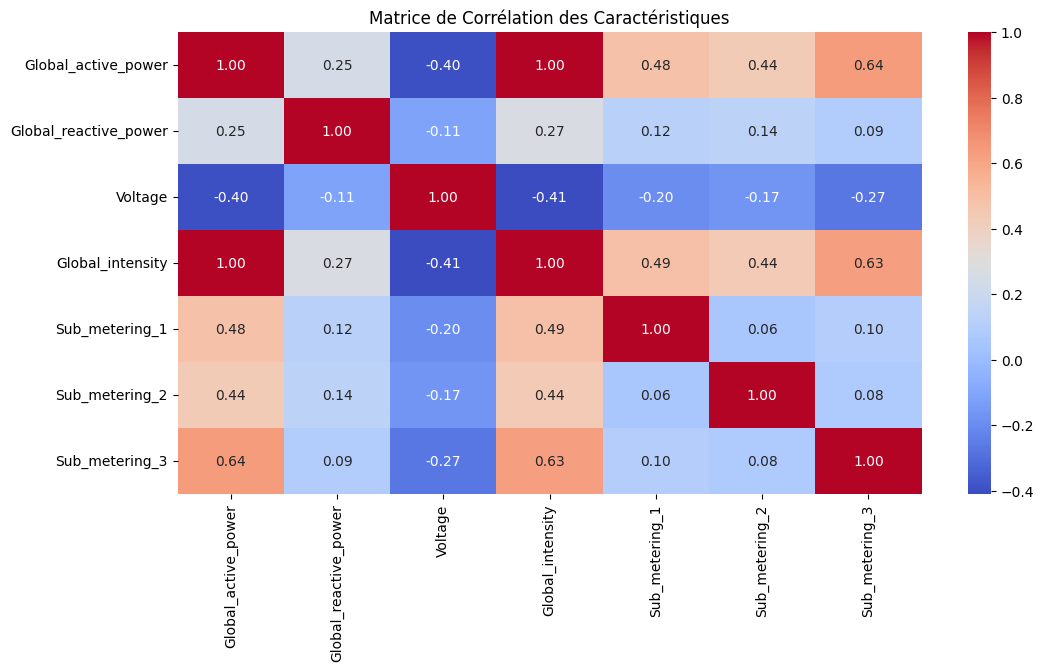

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#Select numerical columns for correlation (you can modify this list based on your actual column names)
numeric_columns = [col for col, dtype in df.dtypes if dtype in ['int', 'double', 'float']]

# Compute the correlation matrix
corr_matrix = df.select(numeric_columns).toPandas().corr()

# Visualize the correlation matrix using Seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation des Caractéristiques')
plt.show()

In [32]:

from pyspark.sql import functions as F
from pyspark.sql.functions import col
import os

# Step 1: Drop unnecessary columns (Global_intensity is removed as per the original code)
df = df.drop('Global_intensity')

# Step 2: Split the data into training and testing datasets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)



In [34]:
# Step 3: Define the feature columns (all columns except for the target column)
feature_columns = [c for c in df.columns if c not in ['Global_active_power']]

# Step 4: Check for missing values in both training and testing datasets
X_train_missing = train_data.select([F.sum(F.col(c).isNull().cast("int")).alias(c) for c in feature_columns])
X_test_missing = test_data.select([F.sum(F.col(c).isNull().cast("int")).alias(c) for c in feature_columns])

# Show missing values count
X_train_missing.show()
X_test_missing.show()

# Step 5: Drop rows with NaN in the training and testing data
train_data_cleaned = train_data.dropna()
test_data_cleaned = test_data.dropna()

# Step 6: Align y_train and y_test with the cleaned data (Global_active_power as the target column)
y_train_cleaned = train_data_cleaned.select('Global_active_power')
y_test_cleaned = test_data_cleaned.select('Global_active_power')



12:45:26.574 [Executor task launch worker for task 5.0 in stage 42.0 (TID 189)] ERROR org.apache.spark.executor.Executor - Exception in task 5.0 in stage 42.0 (TID 189)
org.apache.spark.SparkFileNotFoundException: File file:/home/insaf/Bureau/bigdata/household_power_consumption.txt does not exist
It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.readCurrentFileNotFoundError(QueryExecutionErrors.scala:781) ~[spark-catalyst_2.12-3.5.3.jar:3.5.3]
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:220) ~[spark-sql_2.12-3.5.3.jar:3.5.3]
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:279) ~[spark-sql_2.12-3.5.3.jar:3.5.3]
	at 

Py4JJavaError: An error occurred while calling o635.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 5 in stage 42.0 failed 1 times, most recent failure: Lost task 5.0 in stage 42.0 (TID 189) (192.168.1.5 executor driver): org.apache.spark.SparkFileNotFoundException: File file:/home/insaf/Bureau/bigdata/household_power_consumption.txt does not exist
It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.readCurrentFileNotFoundError(QueryExecutionErrors.scala:781)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:220)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:279)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:129)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.sort_addToSorter_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doAggregateWithoutKey_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:140)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
Caused by: org.apache.spark.SparkFileNotFoundException: File file:/home/insaf/Bureau/bigdata/household_power_consumption.txt does not exist
It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.readCurrentFileNotFoundError(QueryExecutionErrors.scala:781)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:220)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:279)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:129)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.sort_addToSorter_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.hashAgg_doAggregateWithoutKey_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:140)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)


In [ ]:
output_path = "test_data.csv"

# Sauvegarder les données dans un seul fichier CSV
if not os.path.exists(output_path):
    # Utilisation de coalesce(1) pour fusionner toutes les partitions en une seule
    test_data.coalesce(1).write.csv(output_path, header=True, mode="overwrite")
    print(f"Les données de test ont été sauvegardées dans '{output_path}'")
else:
    print("Le fichier des données de test existe déjà.")

import shutil

# Déplacer le fichier généré vers un fichier CSV unique
output_file = "/home/insaf/Bureau/bigdata/test1_data.csv"
if os.path.exists("test_data.csv"):
    shutil.move("test_data.csv/part-00000-2aefee04-0972-468d-ae90-96d462c30c54-c000.csv", output_file)
    print(f"Fichier unique sauvegardé sous '{output_file}'")



In [21]:
from pyspark.ml.feature import StandardScaler, VectorAssembler 

#Step 7: Assemble features into a single vector column for model input
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

train_data_ready = assembler.transform(train_data_cleaned).select('features', 'Global_active_power')
test_data_ready = assembler.transform(test_data_cleaned).select('features', 'Global_active_power')

# Step 8: Feature scaling using StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")

scaler_model = scaler.fit(train_data_ready)
train_data_scaled = scaler_model.transform(train_data_ready)
test_data_scaled = scaler_model.transform(test_data_ready)

# Show the prepared data (scaled features)
train_data_scaled.show()
test_data_scaled.show()

# Optional: Verify the schema after processing
train_data_scaled.printSchema()
test_data_scaled.printSchema()

+--------------------+-------------------+--------------------+
|            features|Global_active_power|     scaled_features|
+--------------------+-------------------+--------------------+
|(5,[1],[236.28999...|              0.082|(5,[1],[73.420114...|
|(5,[1],[236.08999...|              0.084|(5,[1],[73.357971...|
|(5,[1],[236.80000...|              0.084|(5,[1],[73.578585...|
|(5,[1],[236.99000...|              0.084|(5,[1],[73.637622...|
|(5,[1],[237.66000...|              0.084|(5,[1],[73.845804...|
|(5,[1],[237.89999...|              0.084|(5,[1],[73.920374...|
|(5,[1],[238.02999...|              0.084|(5,[1],[73.960769...|
|(5,[1],[238.05999...|              0.084|(5,[1],[73.970091...|
|(5,[1],[238.11000...|              0.084|(5,[1],[73.985627...|
|(5,[1],[238.14999...|              0.084|(5,[1],[73.998054...|
|(5,[1],[238.30999...|              0.084|(5,[1],[74.047771...|
|(5,[1],[238.36999...|              0.084|(5,[1],[74.066413...|
|(5,[1],[238.39999...|              0.08

+--------------------+-------------------+--------------------+
|            features|Global_active_power|     scaled_features|
+--------------------+-------------------+--------------------+
|(5,[1],[236.71000...|              0.084|(5,[1],[73.550621...|
|(5,[1],[237.66999...|              0.084|(5,[1],[73.848910...|
|(5,[1],[237.97999...|              0.084|(5,[1],[73.945232...|
|    (5,[1],[238.25])|              0.084|(5,[1],[74.029128...|
|(5,[1],[238.42999...|              0.084|(5,[1],[74.085056...|
|     (5,[1],[238.5])|              0.084|(5,[1],[74.106808...|
|(5,[1],[238.82000...|              0.084|(5,[1],[74.206241...|
|(5,[1],[238.91999...|              0.084|(5,[1],[74.237310...|
|(5,[1],[239.25999...|              0.084|(5,[1],[74.342954...|
|(5,[1],[239.25999...|              0.084|(5,[1],[74.342954...|
|(5,[1],[239.27999...|              0.084|(5,[1],[74.349170...|
|(5,[1],[239.32000...|              0.084|(5,[1],[74.361601...|
|(5,[1],[239.33000...|              0.08

In [22]:
# Enregistrer le modèle scaler dans un répertoire
scaler_model.save("scaler_model")


Py4JJavaError: An error occurred while calling o479.save.
: java.io.IOException: Path scaler_model already exists. To overwrite it, please use write.overwrite().save(path) for Scala and use write().overwrite().save(path) for Java and Python.
	at org.apache.spark.ml.util.FileSystemOverwrite.handleOverwrite(ReadWrite.scala:683)
	at org.apache.spark.ml.util.MLWriter.save(ReadWrite.scala:167)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)


Linear regression 

In [33]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Initialize the linear regression model
lr = LinearRegression(featuresCol="scaled_features", labelCol="Global_active_power")

# Train the model on the scaled training data
lr_model = lr.fit(train_data_scaled)

# Predict on the scaled test data
predictions = lr_model.transform(test_data_scaled)

# Evaluate the model's performance using MSE (Mean Squared Error)
evaluator_mse = RegressionEvaluator(labelCol="Global_active_power", predictionCol="prediction", metricName="mse")
mse = evaluator_mse.evaluate(predictions)

# Evaluate the model's performance using R² (coefficient of determination)
evaluator_r2 = RegressionEvaluator(labelCol="Global_active_power", predictionCol="prediction", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)

# Print the evaluation metrics
print(f'MSE: {mse}')
print(f'R²: {r2}')


MSE: 0.28602665827501
R²: 0.742752415932435


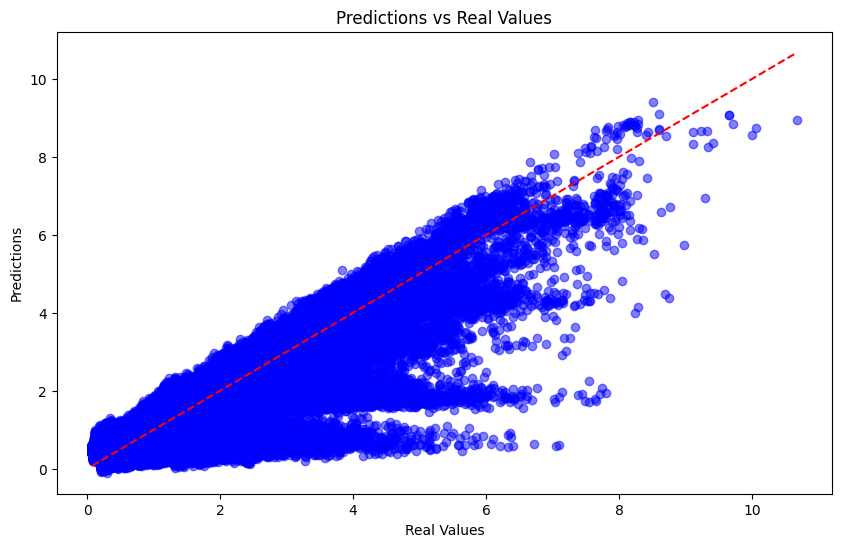

In [34]:
import matplotlib.pyplot as plt

# Extract predictions and real values
predicted_values = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()
real_values = predictions.select("Global_active_power").rdd.flatMap(lambda x: x).collect()

# Visualize predictions vs real values
plt.figure(figsize=(10, 6))
plt.scatter(real_values, predicted_values, alpha=0.5, color='blue')
plt.plot([min(real_values), max(real_values)], [min(real_values), max(real_values)], '--', color='red')  # reference line
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Predictions vs Real Values')
plt.show()


In [35]:
from pyspark.sql.functions import col

# Sauvegarder un modèle PySpark avec la méthode save
lr_model.save("lr_model")



Ng Boost 

In [36]:
print(y_train_cleaned.columns)


['Global_active_power']


In [37]:
X_train_np = np.array(X_train_cleaned.select("scaled_features").rdd.map(lambda row: row[0]).collect())
X_test_np = np.array(X_test_cleaned.select("scaled_features").rdd.map(lambda row: row[0]).collect())

NameError: name 'X_train_cleaned' is not defined

In [106]:
y_train_np = np.array(y_train_cleaned.rdd.map(lambda row: row[0]).collect())

print(X_train_np.shape)  # Should output something like (n_samples, n_features)
print(y_train_np.shape)  # Should output something like (n_samples,)


(1639505, 5)
(1639505,)


In [118]:

# Ensure that `scaled_features` is in the correct format (e.g., a vector)
# Collect the features and target into NumPy arrays
X_train_np = np.array(X_train_cleaned.select("scaled_features").rdd.map(lambda row: row[0].toArray()).collect())
y_train_np = np.array(y_train_cleaned.select("Global_active_power").rdd.map(lambda row: row[0]).collect())

# Make sure the target is 1D
y_train_np = y_train_np.ravel()

# Print the shapes to ensure they are correct
print("Shape of X_train_np:", X_train_np.shape)
print("Shape of y_train_np:", y_train_np.shape)


Shape of X_train_np: (1639505, 5)
Shape of y_train_np: (1639505,)


In [119]:
# Ensure that the number of samples match
assert X_train_np.shape[0] == y_train_np.shape[0], "Mismatch in the number of samples between X and y"



In [120]:
from ngboost import NGBoost
from ngboost.distns import Normal
import numpy as np

# Initialize NGBoost with a normal distribution (for regression)
ngb_model = NGBoost(Dist=Normal)

# Train the NGBoost model using the training data
ngb_model.fit(X_train_np, y_train_np)

# For testing, you can follow a similar process to convert X_test and y_test to NumPy arrays
# Assuming you have a cleaned X_test and y_test Spark DataFrame:
X_test_np = np.array(X_test_cleaned.select("scaled_features").rdd.map(lambda row: row[0].toArray()).collect())
y_test_np = np.array(y_test_cleaned.select("target").rdd.map(lambda row: row[0]).collect())

# Predict the target values using the test data
y_pred = ngb_model.predict(X_test_np)

# The predicted values are stored in y_pred
print("Predicted values:", y_pred)


ValueError: solve: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (m,m),(m,n)->(m,n) (size 1639505 is different from 2)

In [115]:
# Collect the features and target into NumPy arrays
X_train_np = np.array(X_train_cleaned.select("scaled_features").rdd.map(lambda row: row[0].toArray()).collect())
y_train_np = np.array(y_train_cleaned.select("target").rdd.map(lambda row: row[0]).collect())

# Make sure the target is 1D
y_train_np = y_train_np.ravel()

# Check the shapes to debug the mismatch
print("Shape of X_train_np:", X_train_np.shape)  # Should be (n_samples, n_features)
print("Shape of y_train_np:", y_train_np.shape)  # Should be (n_samples,)

# Ensure that the number of samples match
assert X_train_np.shape[0] == y_train_np.shape[0], "Mismatch in the number of samples between X and y"


AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `target` cannot be resolved. Did you mean one of the following? [`Global_active_power`].;
'Project ['target]
+- Project [Global_active_power#691]
   +- Filter atleastnnonnulls(7, Global_active_power#691, Global_reactive_power#701, Voltage#711, Global_intensity#721, Sub_metering_1#731, Sub_metering_2#741, Sub_metering_3#751)
      +- Sample 0.0, 0.8, false, 42
         +- Sort [Global_active_power#691 ASC NULLS FIRST, Global_reactive_power#701 ASC NULLS FIRST, Voltage#711 ASC NULLS FIRST, Global_intensity#721 ASC NULLS FIRST, Sub_metering_1#731 ASC NULLS FIRST, Sub_metering_2#741 ASC NULLS FIRST, Sub_metering_3#751 ASC NULLS FIRST], false
            +- Project [Global_active_power#691, Global_reactive_power#701, Voltage#711, Global_intensity#721, Sub_metering_1#731, Sub_metering_2#741, Sub_metering_3#751]
               +- Project [Date#503, Time#504, Global_active_power#691, Global_reactive_power#701, Voltage#711, Global_intensity#721, Sub_metering_1#731, Sub_metering_2#741, cast(Sub_metering_3#511 as float) AS Sub_metering_3#751]
                  +- Project [Date#503, Time#504, Global_active_power#691, Global_reactive_power#701, Voltage#711, Global_intensity#721, Sub_metering_1#731, cast(Sub_metering_2#510 as float) AS Sub_metering_2#741, Sub_metering_3#511]
                     +- Project [Date#503, Time#504, Global_active_power#691, Global_reactive_power#701, Voltage#711, Global_intensity#721, cast(Sub_metering_1#509 as float) AS Sub_metering_1#731, Sub_metering_2#510, Sub_metering_3#511]
                        +- Project [Date#503, Time#504, Global_active_power#691, Global_reactive_power#701, Voltage#711, cast(Global_intensity#508 as float) AS Global_intensity#721, Sub_metering_1#509, Sub_metering_2#510, Sub_metering_3#511]
                           +- Project [Date#503, Time#504, Global_active_power#691, Global_reactive_power#701, cast(Voltage#507 as float) AS Voltage#711, Global_intensity#508, Sub_metering_1#509, Sub_metering_2#510, Sub_metering_3#511]
                              +- Project [Date#503, Time#504, Global_active_power#691, cast(Global_reactive_power#506 as float) AS Global_reactive_power#701, Voltage#507, Global_intensity#508, Sub_metering_1#509, Sub_metering_2#510, Sub_metering_3#511]
                                 +- Project [Date#503, Time#504, cast(Global_active_power#505 as float) AS Global_active_power#691, Global_reactive_power#506, Voltage#507, Global_intensity#508, Sub_metering_1#509, Sub_metering_2#510, Sub_metering_3#511]
                                    +- Relation [Date#503,Time#504,Global_active_power#505,Global_reactive_power#506,Voltage#507,Global_intensity#508,Sub_metering_1#509,Sub_metering_2#510,Sub_metering_3#511] csv


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R-squared
mse = mean_squared_error(y_test_np, y_pred)
r2 = r2_score(y_test_np, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


LightGBM


In [23]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialisation du modèle LightGBM
lgbm_model = LGBMRegressor(n_estimators=100, random_state=42)

# Entraînement du modèle LightGBM avec les données d'entraînement
lgbm_model.fit(train_data_scaled.select("scaled_features").rdd.map(lambda row: row[0].toArray()).collect(), 
               train_data_scaled.select("Global_active_power").rdd.map(lambda row: row[0]).collect())

# Préparation des données de test
X_test_np = np.array(test_data_scaled.select("scaled_features").rdd.map(lambda row: row[0].toArray()).collect())
y_test_np = np.array(test_data_scaled.select("Global_active_power").rdd.map(lambda row: row[0]).collect())

# Prédictions sur les données de test
y_pred = lgbm_model.predict(X_test_np)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 1660379, number of used features: 5
[LightGBM] [Info] Start training from score 1.085099


In [27]:
from sklearn.metrics import mean_squared_error, r2_score
# Évaluation des performances du modèle en utilisant MSE (Mean Squared Error)
mse = mean_squared_error(y_test_np, y_pred)

# Évaluation des performances du modèle en utilisant R² (coefficient de détermination)
r2 = r2_score(y_test_np, y_pred)

# Affichage des résultats d'évaluation
print(f'MSE: {mse}')
print(f'R²: {r2}')


MSE: 0.2539722639663118
R²: 0.7715816011013696


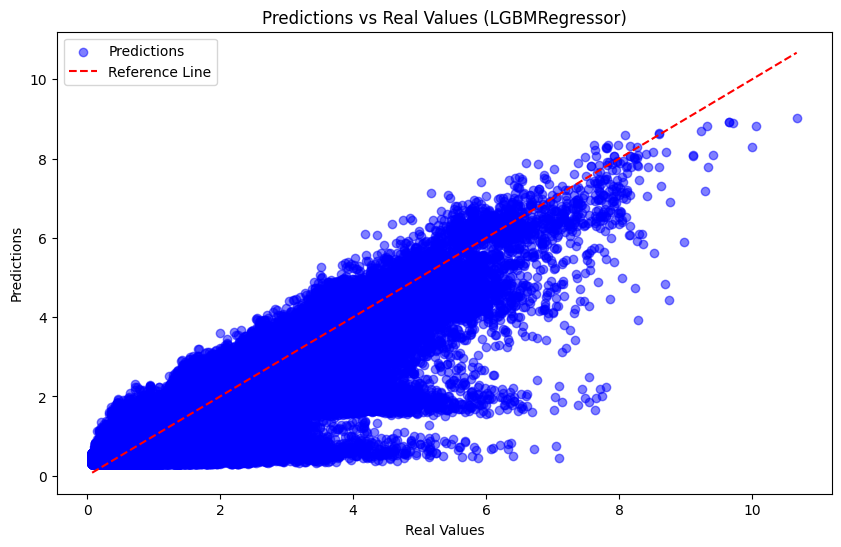

In [28]:
# Visualize predictions vs real values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_np, y_pred, alpha=0.5, color='blue', label='Predictions')
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], '--', color='red', label='Reference Line')  # reference line
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Predictions vs Real Values (LGBMRegressor)')
plt.legend()
plt.show()

In [31]:
import joblib

# Sauvegarder le modèle LightGBM avec joblib
joblib.dump(lgbm_model, 'lgbm_model.joblib')


['lgbm_model.joblib']